X_train:  (101519, 28, 28)
y_train:  (101519, 47)
X_valid:  (11280, 28, 28)
y_valid:  (11280, 47)
X_test:  (18799, 28, 28)
y_test:  (18799, 47)


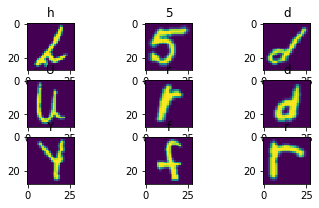

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.keras.backend.set_session(tf.Session(config=config))
# def data_preproccessor() :

train_data = pd.read_csv('emnist/emnist-balanced-train.csv')
test_data = pd.read_csv('emnist/emnist-balanced-test.csv')

mapp = pd.read_csv('emnist/emnist-balanced-mapping.txt',delimiter=' ', 
                   index_col=0,
                   header=None,
                   squeeze=True)

X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values
H = 28
W = 28

def rotate(image):
    image = image.reshape([H,W])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

X_train = np.apply_along_axis(rotate,1,X_train)
X_test = np.apply_along_axis(rotate,1,X_test)

for i in range(100,109) :
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(chr(mapp[y_train[i]]))

num_classes = len(np.unique(y_train))
X_train = X_train.astype('float32')
X_train /=255.0
X_test = X_test.astype('float32')
X_test /=255.0
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)


In [4]:
def model_arch(input_shape) :
    input_x = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu')(input_x)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(256,activation='relu')(X)
    X = tf.keras.layers.Dense(128,activation='relu')(X)
    X = tf.keras.layers.Dense(num_classes,activation='softmax')(X)
    model = tf.keras.Model(inputs=input_x, outputs=X)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model


X_train:  (101519, 28, 28, 1)
y_train:  (101519, 47)
X_valid:  (11280, 28, 28, 1)
y_valid:  (11280, 47)
X_test:  (18799, 28, 28, 1)
y_test:  (18799, 47)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7,

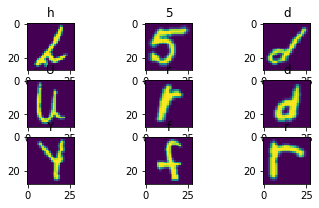

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

tf.keras.backend.set_session(tf.Session(config=config))
# def data_preproccessor() :

train_data = pd.read_csv('emnist/emnist-balanced-train.csv')
test_data = pd.read_csv('emnist/emnist-balanced-test.csv')

mapp = pd.read_csv('emnist/emnist-balanced-mapping.txt',delimiter=' ', 
                   index_col=0,
                   header=None,
                   squeeze=True)

X_train = train_data.iloc[:,1:].values
y_train = train_data.iloc[:,0].values
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0].values
H = 28
W = 28

def rotate(image):
    image = image.reshape([H,W])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

X_train = np.apply_along_axis(rotate,1,X_train)
X_test = np.apply_along_axis(rotate,1,X_test)

for i in range(100,109) :
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(chr(mapp[y_train[i]]))

num_classes = len(np.unique(y_train))
X_train = X_train.reshape([-1,H,W,1])
X_test = X_test.reshape([-1,H,W,1])
X_train = X_train.astype('float32')
X_train /=255.0
X_test = X_test.astype('float32')
X_test /=255.0
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,test_size=0.1)
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

def model_arch(input_shape) :
    input_x = tf.keras.layers.Input(input_shape)
    X = tf.keras.layers.Conv2D(32,(5,5),padding='same',activation='relu')(input_x)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu')(X)
    X = tf.keras.layers.MaxPooling2D((2,2),strides=(2,2))(X)
    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dense(256,activation='relu')(X)
    X = tf.keras.layers.Dense(128,activation='relu')(X)
    X = tf.keras.layers.Dense(num_classes,activation='softmax')(X)
    model = tf.keras.Model(inputs=input_x, outputs=X)
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    model.summary()
    return model

model = model_arch((H,W,1))
# print(chr(mapp[y]))  



In [10]:
import os


In [12]:
DIR = 'model-3'
os.mkdir(DIR)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./model-2/model_{epoch}.h5',
        save_best_only=True,
        monitor='val_loss',
        verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 5,
                          verbose = 1,
                          mode = 'auto'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.9, patience = 3)
]

model.fit( X_train,y_train,
           batch_size=64,
           epochs=10,
           callbacks=callbacks, 
           validation_data=(X_valid,y_valid))

model.save('model-3/model-emnist.h5')


Train on 101519 samples, validate on 11280 samples
Epoch 1/10
101504/101519 [============================>.] - ETA: 0s - loss: 0.6849 - acc: 0.7801
Epoch 00001: val_loss improved from inf to 0.44209, saving model to ./model-2/model_1.h5
101519/101519 [==============================] - 329s 3ms/sample - loss: 0.6848 - acc: 0.7801 - val_loss: 0.4421 - val_acc: 0.8448
Epoch 2/10
101376/101519 [============================>.] - ETA: 0s - loss: 0.3758 - acc: 0.8648
Epoch 00002: val_loss improved from 0.44209 to 0.35895, saving model to ./model-2/model_2.h5
101519/101519 [==============================] - 13s 124us/sample - loss: 0.3759 - acc: 0.8647 - val_loss: 0.3590 - val_acc: 0.8699
Epoch 3/10
101248/101519 [============================>.] - ETA: 0s - loss: 0.3290 - acc: 0.8792
Epoch 00003: val_loss improved from 0.35895 to 0.33505, saving model to ./model-2/model_3.h5
101519/101519 [==============================] - 12s 120us/sample - loss: 0.3291 - acc: 0.8792 - val_loss: 0.3350 - val_

In [13]:
scores = model.evaluate(X_test,y_test)


18799/18799 [==============================] - 4s 239us/sample - loss: 0.3969 - acc: 0.8782


In [14]:
print(scores)

[0.3968747016441772, 0.87818503]
